In [19]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1]:
model_path = "E:\\github_clone\\human-activity-recognition\\models\\SVC_model.pkl"

In [10]:
model_file = open("E:\\github_clone\\human-activity-recognition\\models\\SVC_model.pkl", 'rb')
svc = pickle.load(model_file)

In [11]:
df = pd.read_csv("../data/augmented_data.csv")

In [13]:
X = df.drop(columns=['activity'], axis=1)
y = df['activity']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((846, 24), (94, 24), (846,), (94,))

In [16]:
predicted_val = svc.predict(x_test)

## Classification Report

In [17]:
print(classification_report(y_test, predicted_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        13

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



## Confusion Matrix

In [20]:
#plot confusion matrix
def plt_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_mark = np.arange(len(classes))
  plt.xticks(tick_mark, classes, rotation=45)
  plt.yticks(tick_mark, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.axis]
    print("normalized confusion matrix")

  else:
    print("confusion matrix without normalization")
  
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel("predicted label")
  plt.ylabel("True label")

In [21]:
cm = confusion_matrix(y_test, predicted_val)

In [22]:
class_names = ['downstairs', 'jogging', 'sitting', "standing", "upstairs", "walking", "Activity_1",
                  "Activity_2", "Activity_3"]

confusion matrix without normalization


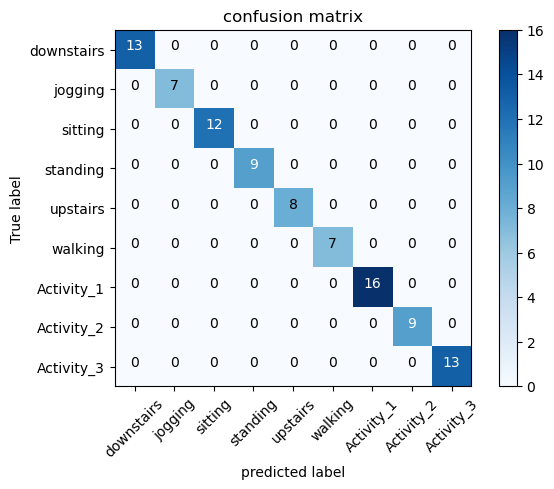

In [23]:
plt_confusion_matrix(cm=cm, classes=class_names, title="confusion matrix", )

## Accuracy

In [26]:
print(accuracy_score(y_test, predicted_val)*100)

100.0
